In [ ]:
import os
SCRIPT_DIR = os.path.dirname(os.path.abspath(__file__))
REPO_PATH = os.path.abspath(os.path.join(SCRIPT_DIR, '..'))

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import os
import matplotlib

# optional - use Arial font, if installed
# from matplotlib import font_manager
# font_dirs = ['/arial-font/']
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
# for font_file in font_files:
#     font_manager.fontManager.addfont(font_file)
# plt.rcParams['font.family'] = 'Arial'

In [3]:
df = pd.read_csv(os.path.join(REPO_PATH, 'data-exp/exp_merged_efh.csv'))

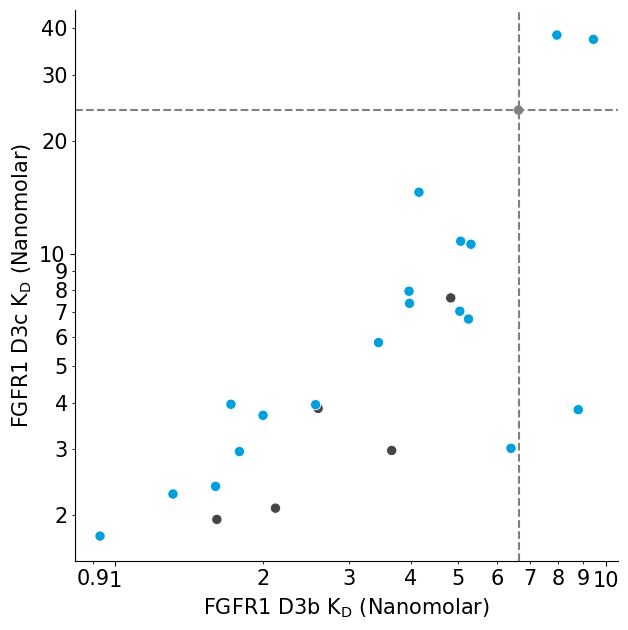

In [4]:
fig, ax = plt.subplots(figsize = (6.4, 6.4))

df['T200 D3b KD (nM)'] = df['T200 D3b KD (M)'] * 1e9
df['T200 D3c KD (nM)'] = df['T200 D3c KD (M)'] * 1e9

xcol = 'T200 D3b KD (nM)'
ycol = 'T200 D3c KD (nM)'

sns.scatterplot(
    x = xcol,
    y = ycol,
    data = df[df['Source'] != 'Prior campaign'],
    hue = 'Source',
    palette = {
        'Baseline': '#434649',
        'SimpleFitness': '#00a0dc',
        'Parental': 'gray',
    },
    ax = ax,
    s = 55,
)
sns.despine()
ax.get_legend().remove()

# ax.add_line(matplotlib.lines.Line2D(
#     [1, 10], 
#     [30, 2], 
#     linestyle = '--',
#     color = 'gray',
# ))

plt.yscale('log')
plt.xscale('log')

# Add line to ax
import matplotlib
line_yval = df[df['Source'] == 'Parental'][ycol]
ax.add_line(matplotlib.lines.Line2D(
    ax.get_xbound(), 
    [line_yval, line_yval], 
    linestyle = '--',
    color = 'gray',
))
line_xval = df[df['Source'] == 'Parental'][xcol]
ax.add_line(matplotlib.lines.Line2D(
    [line_xval, line_xval], 
    ax.get_ybound(), 
    linestyle = '--',
    color = 'gray',
))

# Tick labels
# plt.xticks(np.arange(1, 10 + 1, 1.0));
# ax.locator_params(axis='y',nbins=10)
plt.tick_params(axis='y', which='minor')
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_minor_formatter(FormatStrFormatter("%g"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%g"))

plt.tick_params(axis='x', which='minor')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%g"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%g"))

# Modify all text labels, ensure fontsize is between 5 and 7.
FSIZE = 15
ax.set_title('', fontsize = FSIZE)
ax.set_xlabel('FGFR1 D3b $\mathregular{K_D}$ (Nanomolar)', fontsize = FSIZE)
ax.set_ylabel('FGFR1 D3c $\mathregular{K_D}$ (Nanomolar)', fontsize = FSIZE)
# legend = plt.legend(title = '', fontsize = FSIZE, loc = 'best')
# legend.get_title().set_fontsize('%s' % (FSIZE))
ax.tick_params(axis='both', which='major', labelsize=FSIZE)
ax.tick_params(axis='both', which='minor', labelsize=FSIZE)

# Save to pdf, ensuring that text fields are editable and not imported as shapes
plt.tight_layout()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = f'f1e-spr-plot.pdf'
plt.savefig(out_fn, transparent = True)
plt.savefig(out_fn.replace('.pdf', '.png'))